## Import libs

In [4]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

import tensorflow_datasets as tfds
from tensorflow import keras

In [5]:
print(tf.__version__)

2.0.0


In [6]:
import pandas as pd

## load dataset

In [7]:
mnist = keras.datasets.fashion_mnist

In [8]:
type(mnist)

module

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
np.max(X_train)

255

In [12]:
np.mean(X_train)

72.94035223214286

In [13]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'scandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

# data exploration

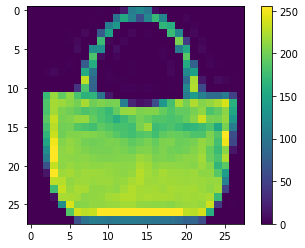

In [14]:
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()

In [15]:
X_train=X_train / 255.0
X_test=X_test / 255.0

# Build the model with TF 2.0

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [17]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Model compilation
+ Loss function
+ Optimizer
+ Metrics

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4946 - accuracy: 0.8260
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3739 - accuracy: 0.8649
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3356 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.3133 - accuracy: 0.8847
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2950 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2802 - accuracy: 0.8970
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2662 - accuracy: 0.9011
Epoch 8/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2560 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2467 - accuracy: 0.9079
Epoch 10/1

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8814


## Model validation

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

0.8814